### Tide and wind conditions at model spill locations in the Salish Sea

Descriptions of surface ocean conditions at nearest locations to spill sites for each oil spill scenario

## Salish Sea Conditions
- Tides, taken from the nearest tide gauge from the [DFO-Pacific website](https://www.pac.dfo-mpo.gc.ca/science/charts-cartes/obs-app/observed-eng.aspx?StationID=07735), [updated to this site](https://tides.gc.ca/en/stations/08525) 
- Surface winds, hourly atmospheric field values from the Environment Canada High Resolution Deterministic Prediction System (HRDPS) atmospheric forcing model.
- Fraser River Discharge (m^3), from SalishSeaCast.
- Total River Flux (m^3/s), from SalishSeaCast.

### Spill Scenarios
Point source spill scenarios based on discussion with DFO & Transport Canada. [Full scenario descriptions](https://docs.google.com/spreadsheets/d/17HgaXoKG5b0zkigri6Vdw7fNviDKVzzTVrbpVVRrCjk/edit?usp=sharing).

| **spill ID**  | **oil** | **spill size (m^3)** | **season** | **location** |
|---------|---------|--------------------|------------|--------------|
| 4a | Diesel | 500 | summer, ebb tide | Active Pass |
| 5b | Dilbit | 2000 | winter, ebb tide | Turn Point, Arachne Reef |
| 6a | Bunker C| 15 | summer, flood tide | leaving Vancouver Harbour, at Anchorage (English Bay)|
| 7a | Bunker C| 1000 | winter storm, flood tide | Juan de Fuca Strait|

In [1]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime, date
from IPython.display import Image

from salishsea_tools import places, wind_tools

In [2]:
# Data Paths
current_path = Path('/ocean/rlovindeer/Atlantis/Physics/Raw_Transport_Data/')
wind_path = Path('/ocean/rlovindeer/Atlantis/Physics/Wind/')
wind_speed_path = Path('/results/forcing/atmospheric/GEM2.5/operational/') #file format ops_y2019m07d07.nc vars(u_wind, v_wind)
sea_grid = Path('/ocean/rlovindeer/Atlantis/Physics/Grids/ubcSSnBathymetryV17-02_a29d_efc9_4047.nc')
air_grid = Path('/ocean/rlovindeer/Atlantis/Physics/Grids/ubcSSaAtmosphereGridV1_0f03_6268_df4b.nc')
river_path = Path('/ocean/rlovindeer/MOAD/analysis-raisha/notebooks/contaminant-dispersal/results/Rivers')
tide_path = Path('/ocean/rlovindeer/MOAD/analysis-raisha/notebooks/contaminant-dispersal/results/Tides')

### Exploring river discharge and flux into the Salish Sea

Work by Cassidy Donaldson, looking at 2019-2023 rivers in the SalishSeaCast model was used to help select the run years. Cassidy suggests a low Fraser River flow year of **2019** "- the freshet peak is low, AND it trails off early in the summer. 2023 is another low bulk flow year, but the early part of the freshet peak is comparable to the other years so I wouldn't use that to represent low." She suggests a high Fraser River flow year of **2020** "2022 also has high flow, but the freshet starts pretty late in the season."

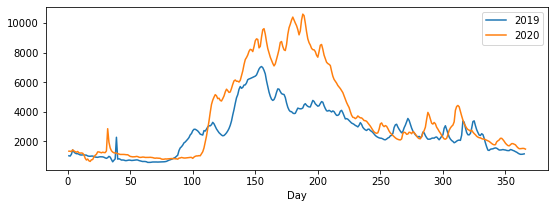

In [4]:
rivers = sorted([p for p in river_path.glob('*_2019_2020.csv')])
for path in rivers:
    discharge = pd.read_csv(path)
    discharge.plot('Day', figsize=(9, 3))
    max = discharge.max()
    min = discharge.min()

### Exporing tides for each scenario location

| **spill ID**  | **season** |**location** | **tide gauge location** |
|---------|----------|----------|------------|
| 4a | summer, ebb tide | Active Pass | Sand Heads |
| 5b | winter, ebb tide | Turn Point, Arachne Reef | Sand Heads * same results as Victoria |
| 6a | summer, flood tide | English Bay| Sandy Cove |
| 7a | winter storm, flood tide | Juan de Fuca Strait | Port Renfrew |

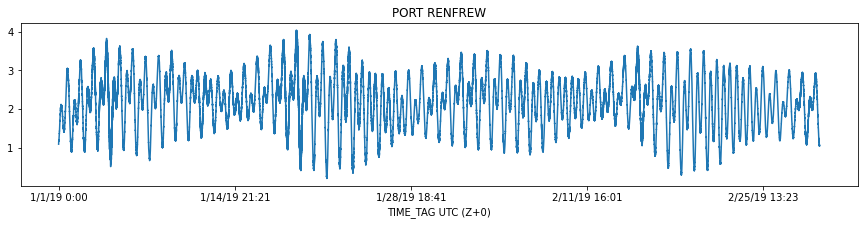

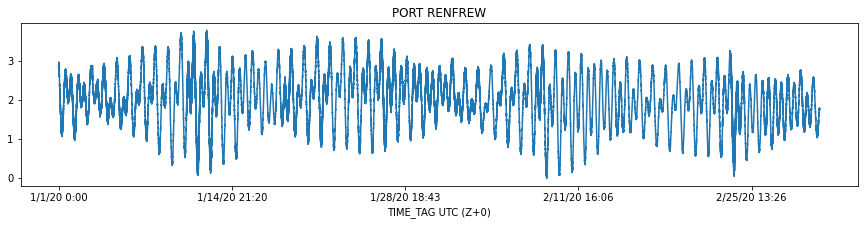

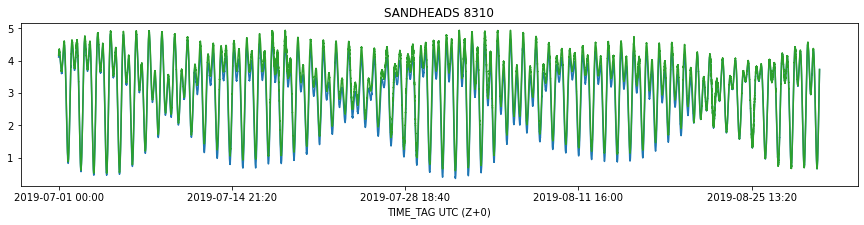

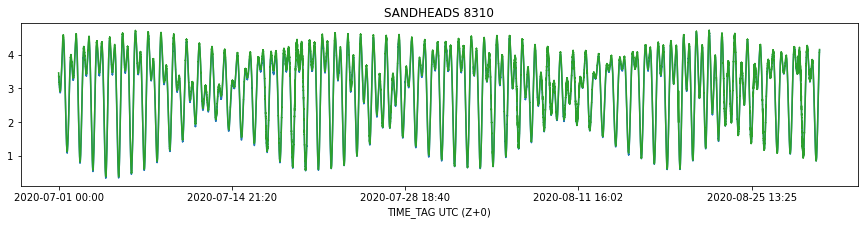

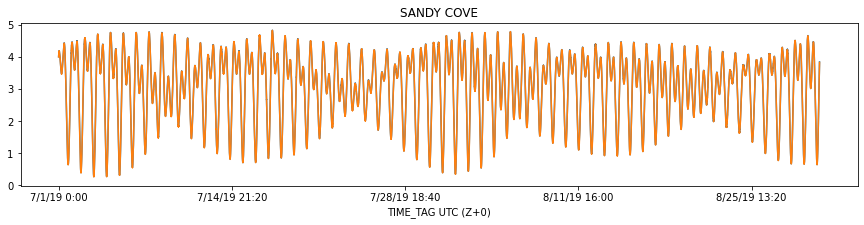

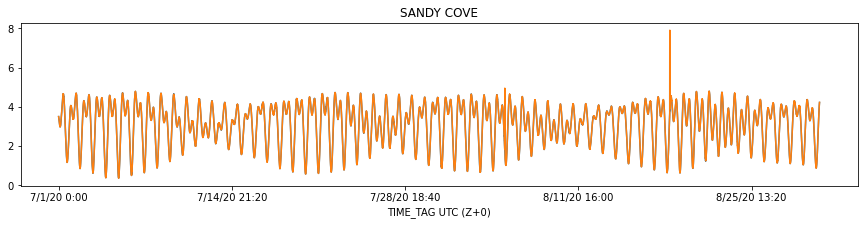

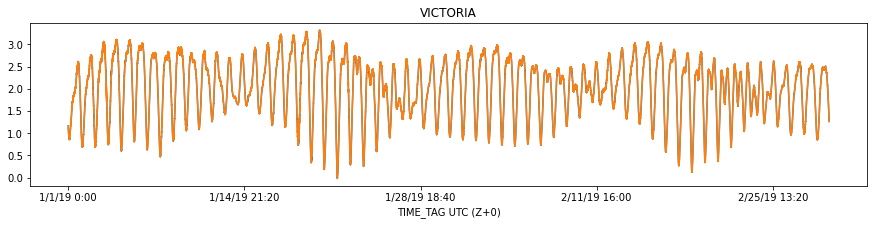

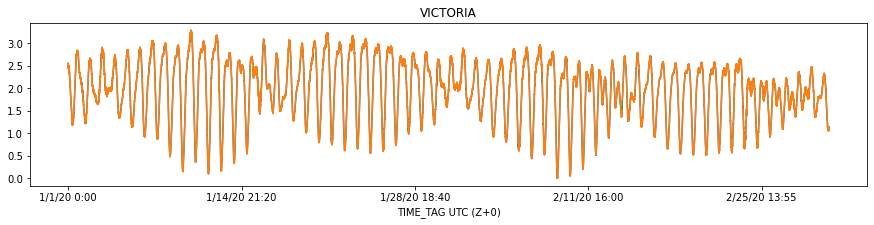

In [9]:
# Tides
tides = sorted([p for p in tide_path.glob('*.csv')])
for path in tides:
    tide_data = pd.read_csv(path)
    station = tide_data['STATION_ID'][1]
    tide_data.plot('TIME_TAG UTC (Z+0)', figsize=(15, 3), legend=False, title=station)

### Exploring surface wind speed

Karyn Suchy plotted wind anolamies for the central Strait of Georgia that showed negative anomalies for 2019, and trending positive anomalies for 2020, enabling comparison between the two years. Wind speed data captured near the spill sites for both years are presented below.

In [5]:
def plot_wind_speed(wind_paths, place):
    
    yx = places.PLACES[place]['wind grid ji']
    
    winds = sorted([p for p in wind_path.glob(wind_paths)])
    plt.figure(figsize = (15,3))
    for path in winds:
        wind_data = xr.open_dataset(path)
        wind_speed, wind_dir = wind_tools.wind_speed_dir(wind_data.u_wind[:,yx[0],yx[1]], wind_data.v_wind[:,yx[0],yx[1]])
        plt.plot(wind_data.time, wind_speed, 'ok')

Sand Heads

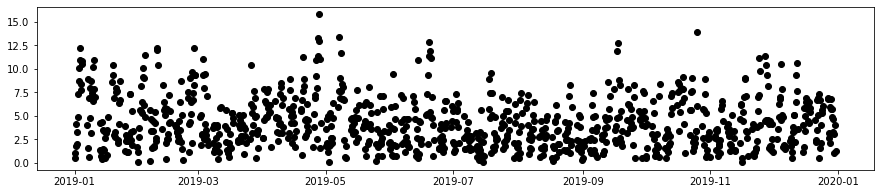

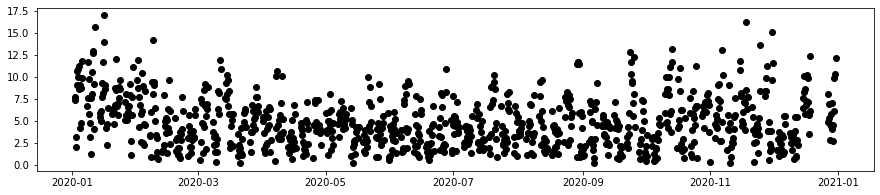

In [6]:
for year in [2019, 2020]:
    plot_wind_speed(str(year)+'*_Wind_variables.nc', 'Sand Heads')

Victoria

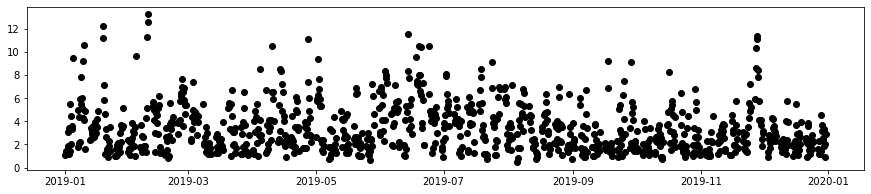

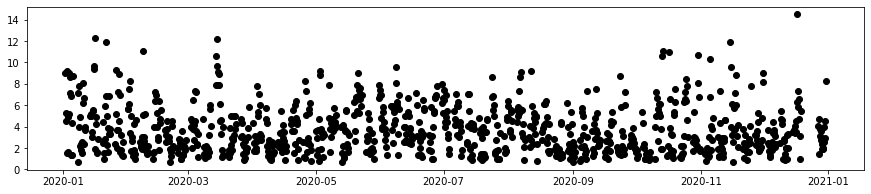

In [7]:
for year in [2019, 2020]:
    plot_wind_speed(str(year)+'*_Wind_variables.nc', 'Victoria')

Sandy Cove

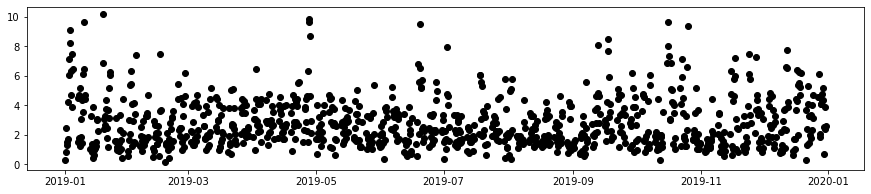

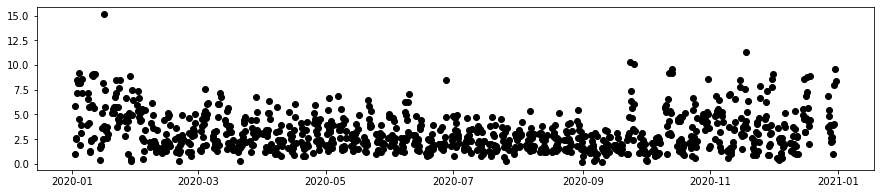

In [8]:
for year in [2019, 2020]:
    plot_wind_speed(str(year)+'*_Wind_variables.nc', 'Sandy Cove')

Port Renfrew

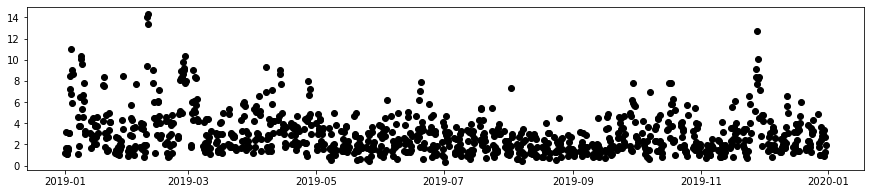

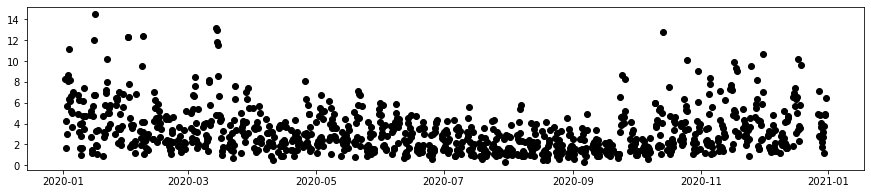

In [10]:
for year in [2019, 2020]:
    plot_wind_speed(str(year)+'*_Wind_variables.nc', 'Port Renfrew')